# Analytical Report of Youtube Comments

### Importing Libraries

In [106]:
import pandas as pd
import numpy as np

### Unzipping the Dataset File

In [107]:
path_to_zip_file = "./sample_data/youtube_comments.zip"
directory_to_extract_to = "./sample_data"

In [108]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)

### Insert Dataset as Pandas Dataset

In [109]:
data = pd.read_csv("./sample_data/YoutubeCommentsDataSet.csv")

## EDA (Exploratory Data Analaysis)

In [110]:
# First 5 Data of the Dataset
data.head(5)

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [111]:
# Last 5 Data of the Dataset
data.tail(5)

,Comment,Sentiment
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive
18407,this is great focus is key a playful approach ...,positive


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [113]:
totaldata = len(data)
totaldata

18408

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

### Sentiment EDA

<ipython-input-115-494a9362c7a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data, palette="Blues")


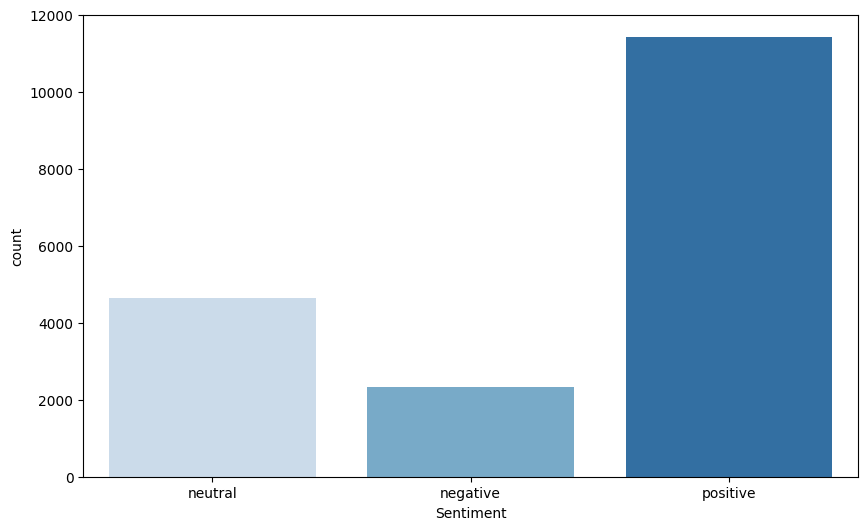

In [115]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sentiment", data=data, palette="Blues")
plt.show()

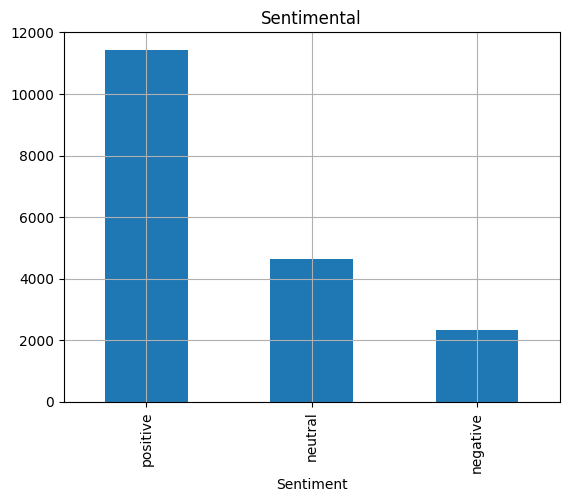

In [116]:
data['Sentiment'].value_counts().plot(kind='bar', grid=True)
plt.title('Sentimental')
plt.show()

### Comment Column (EDA)

In [117]:
dataComments = data['Comment']
dataComments.head(5)

,Comment
0,lets not forget that apple pay in 2014 require...
1,here in nz 50 of retailers don’t even have con...
2,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...
4,apple pay is so convenient secure and easy to ...


## Data Comment Cleaning

In [118]:
import re
def clean_text(text):
  if not isinstance(text, str):
    return ''
  text = re.sub(r'http\S+','', text)
  text = re.sub(r'[^\w\s]','',text)
  text = text.lower()
  return text

### Drop Rows with Missing Values

In [119]:
data = data.dropna(subset=['Comment'])

### Missing values with an Empty String

In [120]:
data['Comment'] = data['Comment'].fillna('')

### Filter Out Non-String Values

In [121]:
data = data[data['Comment'].apply(lambda x: isinstance(x, str))]

In [122]:
data['Comment'] = data['Comment'].apply(clean_text)

In [123]:
data.head(5)

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers dont even have cont...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesnt take appl...,negative
4,apple pay is so convenient secure and easy to ...,positive


### WordCloud Words

In [124]:
from wordcloud import WordCloud

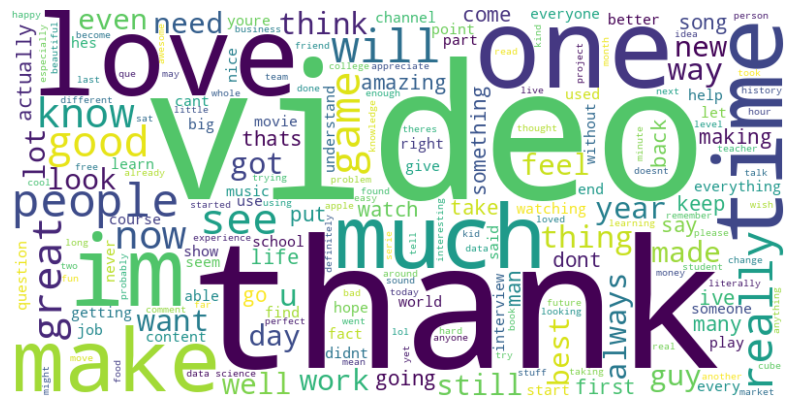

In [125]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Comment']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## More EDA

### Basic Statistics

In [127]:
# Number of comments
print("Total comments: ", len(data['Comment']))

Total comments:  18364


In [129]:
# Average comment length
data['comment_length'] = data['Comment'].apply(len)
print("Average comment length: ", data['comment_length'].mean())

Average comment length:  177.07389457634503


In [130]:
data.head(5)

,Comment,Sentiment,comment_length
0,lets not forget that apple pay in 2014 require...,neutral,317
1,here in nz 50 of retailers dont even have cont...,negative,161
2,i will forever acknowledge this channel with t...,positive,183
3,whenever i go to a place that doesnt take appl...,negative,441
4,apple pay is so convenient secure and easy to ...,positive,135


In [131]:
# Most frequent commenters
most_frequent_comments = data['Comment'].value_counts().head(10)
most_frequent_comments_df = most_frequent_comments.reset_index()
most_frequent_comments_df.columns = ['Comment', 'Frequency']

In [132]:
# Display the table
print(most_frequent_comments_df)

                                             Comment  Frequency
0                                               nice         10
1  one of the best thing about dude is that he ne...         10
2  im honestly impressed by the time and effort y...         10
3  2323 hermosa elección 18kissxuno los mortales ...          9
4  this man literally born to create history hats...          8
5  i love lofi beats just helps me get through th...          6
6  honestly i appreciate you and your content tec...          6
7  i love watching these normal things being turn...          6
8  2323 hermosa elección 18kissxuno los mortales ...          5
9  what a life this mans living while helping tho...          5


In [133]:
from tabulate import tabulate

In [134]:
table = most_frequent_comments_df.values.tolist()

In [135]:
print(tabulate(table, headers=['Commenter', 'Number of Comments'], tablefmt='pretty'))

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|                                                                                                                                                                                                                 

### Word Frequency Analysis

In [136]:
from collections import Counter
import matplotlib.pyplot as plt

In [137]:
all_words = ' '.join(data['Comment'])

In [138]:
word_freq = Counter(all_words.split())

In [139]:
print(word_freq.most_common(10))

[('the', 22752), ('to', 15006), ('and', 14554), ('i', 13545), ('a', 13192), ('of', 9609), ('you', 8220), ('is', 8079), ('in', 7723), ('this', 7234)]


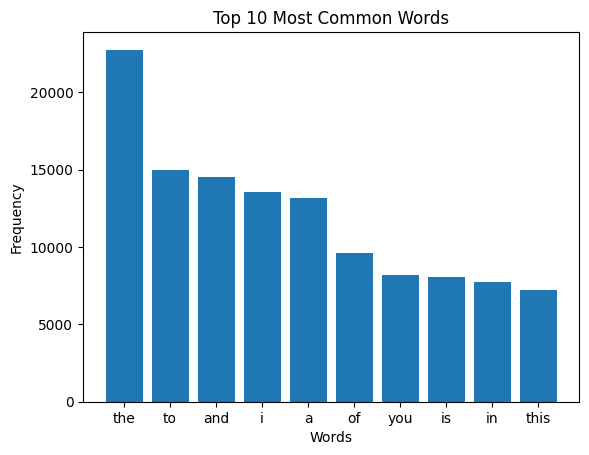

In [140]:
plt.bar(*zip(*word_freq.most_common(10)))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.show()

### Emoji Analysis

In [141]:
pip install emoji

In [142]:
import emoji

In [143]:
def extract_emojis(text):
  return ''.join(c for c in text if c in emoji.EMOJI_DATA)

In [144]:
data['emojis'] = data['Comment'].apply(extract_emojis)

In [145]:
# Count emoji frequency
emoji_freq = Counter(''.join(data['emojis']))
print(emoji_freq.most_common(10))

[]


### Remove Stop Words

In [153]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [154]:
from nltk.corpus import stopwords

In [155]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

In [156]:
data['Comment'] = data['Comment'].apply(remove_stopwords)
data.head()

,Comment,Sentiment,comment_length,emojis
0,lets forget apple pay 2014 required brand new ...,neutral,317,
1,nz 50 retailers dont even contactless credit c...,negative,161,
2,forever acknowledge channel help lessons ideas...,positive,183,
3,whenever go place doesnt take apple pay doesnt...,negative,441,
4,apple pay convenient secure easy use used kore...,positive,135,


### Changing Sentiment column to Numerical Data

In [157]:
data['Sentiment'] = data['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})

<ipython-input-157-d29a93f16537>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sentiment'] = data['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})


In [158]:
data.head(5)

,Comment,Sentiment,comment_length,emojis
0,lets forget apple pay 2014 required brand new ...,1,317,
1,nz 50 retailers dont even contactless credit c...,0,161,
2,forever acknowledge channel help lessons ideas...,2,183,
3,whenever go place doesnt take apple pay doesnt...,0,441,
4,apple pay convenient secure easy use used kore...,2,135,


## Model Training

### Spliting the data into features (X) and target (y)

In [162]:
X = data['Comment']
y = data['Sentiment']

### Split the dataset into trainning and testing sets (80% train, 20% test)

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Convert text data into numerical features using TF-IDF vectorizer

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [167]:
vectorizer = TfidfVectorizer(max_features=5000)

In [168]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Initialize models

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [171]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "Naive Bayes": MultinomialNB()
}


### Train and evaluate each model

In [173]:
from sklearn.metrics import accuracy_score, classification_report

In [174]:
for model_name, model in models.items():
  print(f"\nTraining {model_name}...")
  model.fit(X_train_tfidf, y_train)

  # Predict the sentiments for the test set
  y_pred = model.predict(X_test_tfidf)

  # Evaluate the model
  print(f"Accuracy Score for {model_name}: {accuracy_score(y_test, y_pred)}")
  print(f"Classification Report for {model_name}: \n{classification_report(y_test, y_pred)}")


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy Score for Logistic Regression: 0.7519738633269807
Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.66      0.26      0.37       441
           1       0.63      0.56      0.59       912
           2       0.79      0.92      0.85      2320

    accuracy                           0.75      3673
   macro avg       0.69      0.58      0.61      3673
weighted avg       0.74      0.75      0.73      3673


Training Random Forest...
Accuracy Score for Random Forest: 0.732371358562483
Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       0.61      0.17      0.26       441
           1       0.63      0.55      0.59       912
           2       0.77      0.91      0.83      2320

    accuracy                           0.73      3673
   macro avg       0.67      0.54      0.56      3673
weighted avg       0.71      0.73      0.70      3673


Training 